In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn wordcloud openpyxl



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd

df = pd.read_csv('data.csv')
display(df.head())


,review,model,sentiment
0,The movie was a complete snoozefest. I regret...,Gemini-1.5-Flash,negative
1,"Seriously, the worst venue I've ever been to. ...",Gemini-1.5-Flash,negative
2,"This event was so poorly organized, it was a j...",Gemini-1.5-Flash,negative
3,What a disaster of a movie! The acting was aw...,Gemini-1.5-Flash,negative
4,I wouldn't recommend this venue to my worst en...,Gemini-1.5-Flash,negative


In [9]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     8236 non-null   object
 1   model      8234 non-null   object
 2   sentiment  8234 non-null   object
dtypes: object(3)
memory usage: 193.2+ KB
None
                                                   review  \
count                                                8236   
unique                                               5678   
top     This ad was pretty standard. The product was s...   
freq                                                   60   

                        model sentiment  
count                    8234      8234  
unique                      6         3  
top     Gemini-2.0-Flash-Lite  positive  
freq                     2853      3110  
review       0
model        2
sentiment    2
dtype: int64


In [5]:
df['review'] = df['review'].astype(str).str.replace('\n', ' ').str.strip()


In [6]:
print(df['sentiment'].value_counts())


sentiment
positive    3110
negative    2663
neutral     2461
Name: count, dtype: int64


In [7]:
# Example: Using simple keyword matching or model-derived labels
df['sentiment'] = df['modelsentiment'].apply(
    lambda x: 'positive' if 'positive' in x.lower()
    else 'negative' if 'negative' in x.lower()
    else 'neutral'
)


KeyError: 'modelsentiment'

In [10]:
print(df.columns)


Index(['review', 'model', 'sentiment'], dtype='object')


In [12]:
df['sentiment'] = df['review'].apply(...)


TypeError: 'ellipsis' object is not callable

In [13]:
df['sentiment'] = df['review'].apply(
    lambda x: 'positive' if 'positive' in x.lower()
    else 'negative' if 'negative' in x.lower()
    else 'neutral'
)


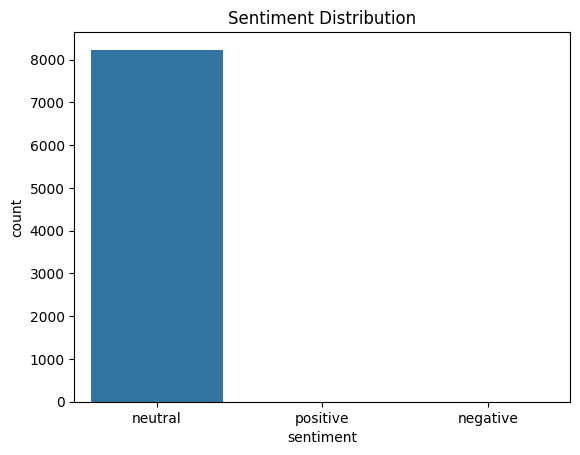

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()


In [15]:
from wordcloud import WordCloud

text = ' '.join(df[df['sentiment'] == 'negative']['review'])
wc = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Common Negative Review Words')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [16]:
!pip install WordCloud


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [18]:
text = ' '.join(df[df['sentiment'] == 'negative']['review'])
wc = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Common Negative Review Words')
plt.show()

NameError: name 'WordCloud' is not defined

In [19]:
from wordcloud import WordCloud

text = ' '.join(df[df['sentiment'] == 'negative']['review'])
wc = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Common Negative Review Words')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [20]:
df['date'] = pd.to_datetime(df['timestamp'])
sentiment_over_time = df.groupby([df['date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)
sentiment_over_time.plot(kind='line', figsize=(12,6))
plt.title('Sentiment Trends Over Time')
plt.show()


KeyError: 'timestamp'

In [21]:
print(df.columns)


Index(['review', 'model', 'sentiment'], dtype='object')


In [22]:
df['date'] = pd.to_datetime(df['actual_column_name'])


KeyError: 'actual_column_name'

In [23]:
!pip install wordcloud



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# Extract top words or topics for each sentiment
from collections import Counter
import re

def get_top_words(text_series, top_n=10):
    words = []
    for review in text_series:
        words.extend(re.findall(r'\w+', review.lower()))
    common_words = Counter(words).most_common(top_n)
    return common_words

print('Negative review keywords:', get_top_words(df[df['sentiment'] == 'negative']['review']))
print('Positive review keywords:', get_top_words(df[df['sentiment'] == 'positive']['review']))
print('Neutral review keywords:', get_top_words(df[df['sentiment'] == 'neutral']['review']))


Negative review keywords: [('nothing', 2), ('it', 1), ('was', 1), ('a', 1), ('neutral', 1), ('experience', 1), ('memorable', 1), ('but', 1), ('negative', 1), ('either', 1)]
Positive review keywords: [('the', 4), ('was', 3), ('positive', 3), ('had', 2), ('a', 2), ('general', 2), ('venue', 1), ('good', 1), ('acoustics', 1), ('that', 1)]
Neutral review keywords: [('the', 11807), ('was', 6386), ('and', 5300), ('i', 4395), ('a', 3870), ('it', 2917), ('is', 1738), ('this', 1513), ('so', 1426), ('s', 1408)]


In [25]:
df.to_excel("categorized_feedback.xlsx", index=False)


ModuleNotFoundError: No module named 'openpyxl'